In [5]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

POT = 1.875e+21

In [26]:
f = h5py.File('output/MINERvA_Dipole_M0.47_mu2.50e-06_example.hdf5','r')
four_momenta = {'nu':[],
                'HNL':[],
                'Gamma':[],
                'NuOut':[]}
vertex = {'upscattering':[],
          'decay':[]}
weights = []
for i in range(f.attrs['num_events']):
    event_group = f['event%d'%i]
    weights.append(event_group.attrs['event_weight'])
    for j in range(event_group.attrs['num_interactions']):
        int_group = event_group['interaction%d'%j]
        if int_group.attrs['primary_type'] == 'ParticleType.NuMu':
            four_momenta['nu'].append(list(int_group['primary_momentum']))
            vertex['upscattering'].append(list(int_group['vertex']))
        else:
            four_momenta['HNL'].append(list(int_group['primary_momentum']))
            vertex['decay'].append(list(int_group['vertex']))
            for isec in range(2):
                if int_group.attrs['secondary_type%d'%isec] == 'ParticleType.Gamma':
                    four_momenta['Gamma'].append(list(int_group['secondary_momentum%d'%isec]))
                else:
                    four_momenta['NuOut'].append(list(int_group['secondary_momentum%d'%isec]))

for k in four_momenta.keys():
    four_momenta[k] = np.array(four_momenta[k])
for k in vertex.keys():
    vertex[k] = np.array(vertex[k])
weights = np.where(np.isnan(weights),0,weights)

f.close()

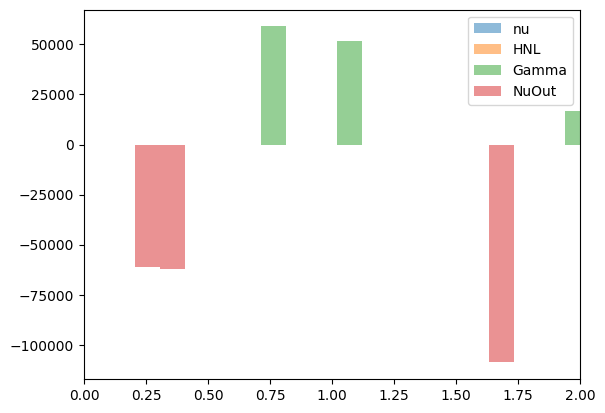

162.66083680289623


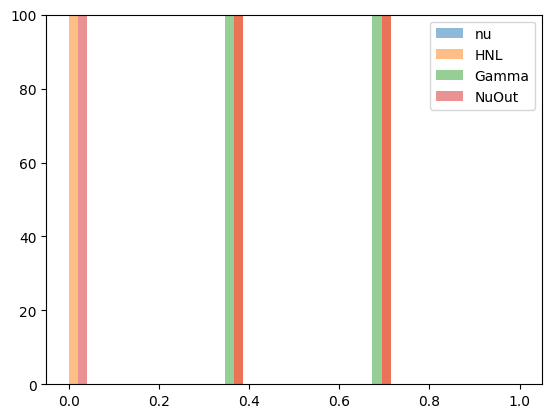

In [27]:
w = weights * POT
fid_mask = np.sqrt(np.sum(vertex['decay']**2,axis=-1))<5
w[np.logical_not(fid_mask)] = 0

# MB efficiency
w *= 0.29 - 0.12*four_momenta['Gamma'][:,0]
w *= four_momenta['Gamma'][:,0]>0.14

bins = np.linspace(0,5,50)
for k,v in four_momenta.items():
    #if k!='nu': continue
    n,_,_ = plt.hist(four_momenta[k][:,0],bins=bins,alpha=0.5,weights=w,label=k)
plt.xlim(0,2)
plt.legend()
plt.show()


bins = np.linspace(0,1,50)
for k,v in four_momenta.items():
    if k == 'HNL':
        print(np.sqrt(np.sum(four_momenta[k][:,1:]**2)))
        CosTheta = four_momenta[k][:,3] / np.sqrt(np.sum(four_momenta[k][:,1:]**2,axis=-1))
    else:
        CosTheta = four_momenta[k][:,3]/four_momenta[k][:,0]
    plt.hist(CosTheta,bins=bins,alpha=0.5,weights=w,label=k)
plt.legend()
#plt.semilogy()
plt.ylim(0,100)
plt.show()

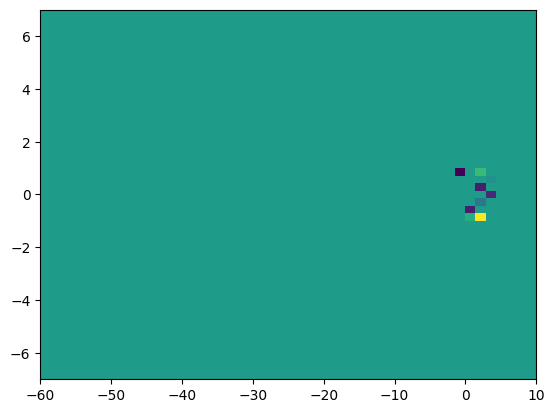

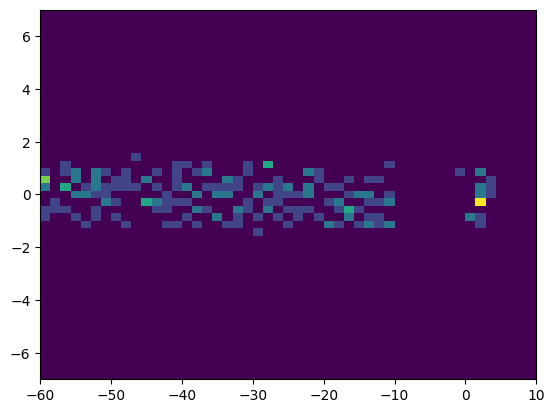

In [28]:
Nbins = 50
zmin = -60
zmax = 10
xbound = 7

zbins = np.linspace(zmin,zmax,Nbins)
xbins = np.linspace(-xbound,xbound,Nbins)

plt.hist2d(vertex['upscattering'][:,2],vertex['upscattering'][:,0],bins=(zbins,xbins),weights=w)
plt.show()

plt.hist2d(vertex['decay'][:,2],vertex['decay'][:,0],bins=(zbins,xbins))#,weights=w)
plt.show()